# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod i w pojawiającym się czarnym obrazie kliknij jeden punkt 
   2. Zamknij edycję przyciskiem w belce okna (obok bazwy Figure 1). Wygenerowany obraz będzie dostępny pod nazwą im.

(-0.5, 63.5, 63.5, -0.5)

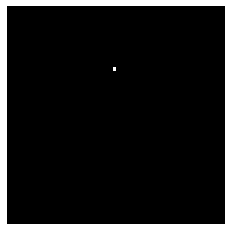

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [4]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

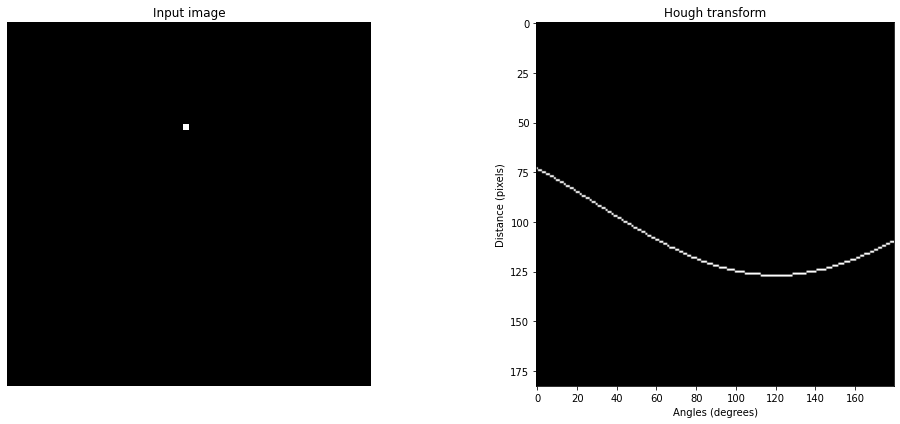

In [5]:
H = hough_line(im)
show_hough(H[0], im)
# print(H)

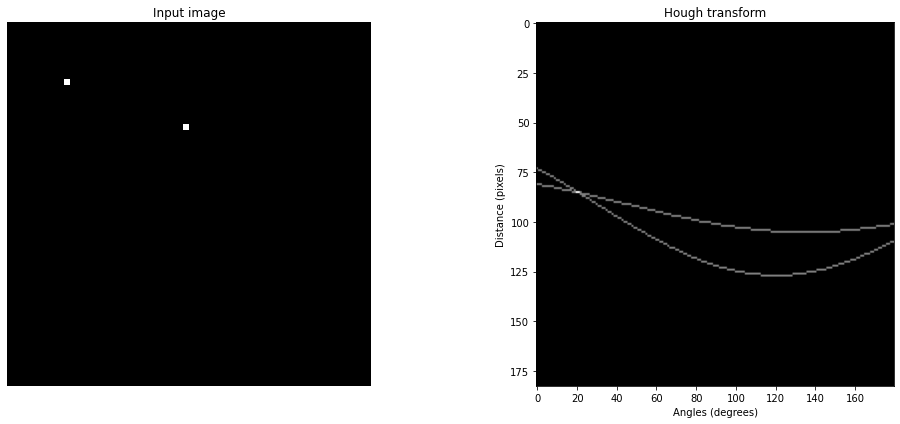

In [6]:
im[10, 10] = 1

H = hough_line(im)
show_hough(H[0], im)

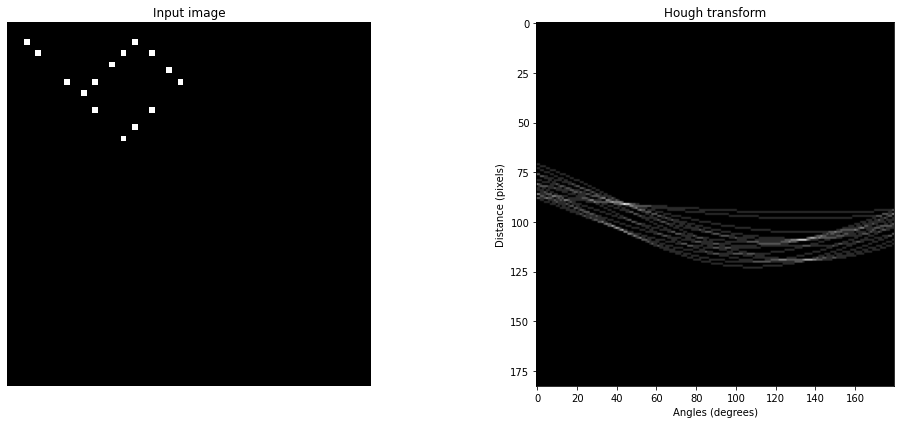

In [7]:
im[18, 31] = 0
im[20, 20] = 1
im[15, 15] = 1
im[5, 5] = 1
im[3, 3] = 1

im[18, 22] = 1
im[15, 25] = 1
im[10, 30] = 1

im[5, 25] = 1
im[3, 22] = 1
im[8, 28] = 1

im[5, 20] = 1
im[7, 18] = 1
im[10, 15] = 1
im[12, 13] = 1


H = hough_line(im)
show_hough(H[0], im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

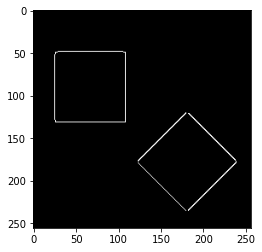

In [8]:
squares = cv2.imread("kwadraty.png")

blur = cv2.GaussianBlur(squares,(15, 15),1)

canny = cv2.Canny(blur, 600, 630, None, 3, 1)

plt.imshow(canny, cmap='gray')
plt.show()

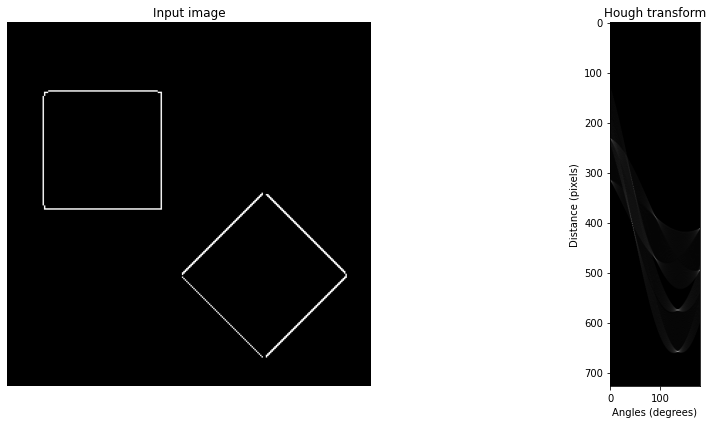

In [9]:
H, theta, rho = hough_line(canny)
show_hough(H, canny)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

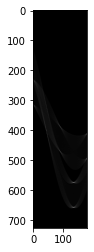

(array([87, 83, 77, 77, 70, 67, 61, 57], dtype=uint64),
 array([-1.57079633,  0.        ,  0.        , -1.57079633, -0.76794487,
         0.76794487, -0.78539816,  0.78539816]),
 array([-131.,  108.,   25.,  -48.,   48.,  212.,  -40.,  294.]))

In [10]:
peaks = hough_line_peaks(H, theta, rho, num_peaks=8)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha
plt.show()

peaks

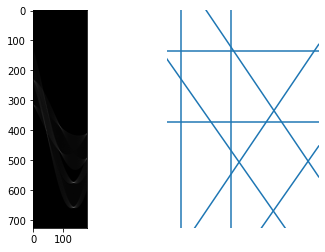

In [11]:
fig,ax = plt.subplots(1, 2)
ax[0].set_aspect('equal')
ax[0].imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

values, angles, dists = hough_line_peaks(H, theta, rho)


# ax[1].imshow(image, cmap=cm.gray)
ax[1].set_ylim((squares.shape[0], 0))
ax[1].set_xlim((0, squares.shape[1]))
ax[1].set_axis_off()
# ax[1].set_title('Detected lines')
for angle, dist in zip(angles, dists):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[1].axline((x0, y0), slope=np.tan(angle + np.pi/2))

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

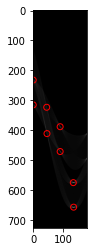

In [14]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

for a, d in zip(angles, dists):

    circle = plt.Circle((np.rad2deg(a + np.pi/2), d+ H.shape[0]/2), 10, color='r', fill=False)

    ax.add_patch(circle)

plt.show() #com

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

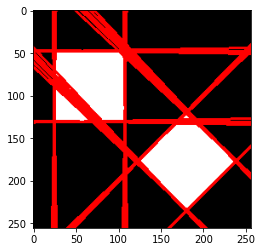

In [20]:
squares = cv2.imread('kwadraty.png')
canny_squares = cv2.Canny(squares, 0, 1)
lines = cv2.HoughLines(canny_squares, 1, np.pi / 180, 40)

for i in range(0, len(lines)):
      for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(squares, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(squares)
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

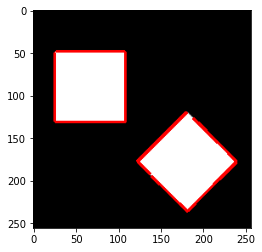

In [56]:
squares = cv2.imread('kwadraty.png')
canny_squares = cv2.Canny(squares, 0, 1)
linesP = cv2.HoughLinesP(canny_squares, 1, np.pi / 180, 30, 10, 10)
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(squares, (l[0], l[1]), (l[2], l[3]), (255, 0, 0), 2)
plt.imshow(squares)
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

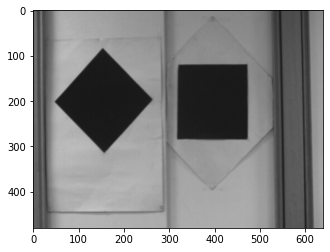

In [70]:
real_squares = cv2.imread("lab112.png")
plt.imshow(real_squares, cmap='gray')
plt.show()

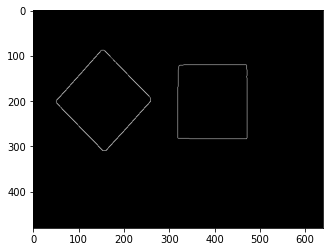

In [71]:
# binaryzacja -> zamknięcie -> canny
threshold_squares = cv2.threshold(real_squares, 50, 255, cv2.THRESH_BINARY)[1]
closed_squares = cv2.morphologyEx(threshold_squares, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (7,7)))
canny_squares = cv2.Canny(closed_squares, 0, 1)

plt.imshow(canny_squares, cmap='gray')
plt.show()


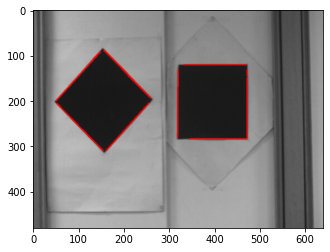

In [72]:
linesP = cv2.HoughLinesP(canny_squares, 1, np.pi / 180, 30, 10, 10)
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(real_squares, (l[0], l[1]), (l[2], l[3]), (255, 0, 0), 2)
plt.imshow(real_squares)
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

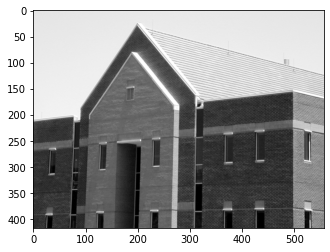

In [63]:
house = cv2.imread("dom.png")
plt.imshow(house)
plt.show()

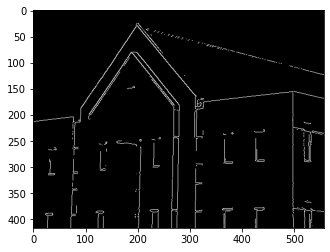

In [99]:
blur = cv2.GaussianBlur(house,(3, 3),1)
canny_house = cv2.Canny(blur, 220, 235)

plt.imshow(canny_house, cmap='gray')
plt.show()

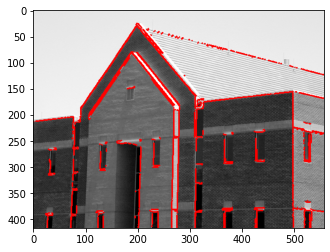

In [105]:
linesP = cv2.HoughLinesP(canny_house, 1, np.pi / 180, 5, 0, 0)
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(house, (l[0], l[1]), (l[2], l[3]), (255, 0, 0), 2)
plt.imshow(house)
plt.show()